In [1]:
import numpy as np
import matplotlib 
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

from astropy.timeseries import LombScargle
from astropy.table import Table

# configure notebook for plotting
%pylab inline --no-import-all 
mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color'] # allows access to colours
# subsequent lines default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [7]:
import glob # this package lets you search for filenames
import os

ddir = ('/Users/calinperez/Desktop/PHYS3080/Untitled/U07/') # local copy of some data formatted like yours will be
ddir_ext = glob.glob(ddir +'/*/*/points.txt', recursive= True)


/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Right/E03/points.txt


In [64]:

#stars = []
#i = 0
#stars = Table.read(ddir_ext[i],format='ascii')
star= Table.read(ddir_ext,format='ascii')
# for i in ddir_ext[i]:
    
#     stars = Table.read(ddir_ext[i],format='ascii')
#     plt.scatter(stars['x'],stars['y'])
#     plt.xlabel('x (pix)')
#     plt.ylabel('y (pix)');
#     i += 1
# print(ddir_ext[i])
#for i in ddir_ext:
 #   i = 0
 #   stars.append(Table.read(ddir_ext[i],format='ascii'))
 #   i = i + 1

print(star)

/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Right/E03/points.txt
--------------------------------------------------------------------
/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Right/E04/points.txt
/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Right/A05/points.txt
/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Right/A02/points.txt
/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Right/C06/points.txt
/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Right/C01/points.txt
/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Right/E05/points.txt
/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Right/E02/points.txt
/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Right/A03/points.txt
/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Right/A04/points.txt
/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Right/B05/points.txt
                                                                 ...
/Users/calinperez/Desktop/PHYS3080/Untitled/U07/Front/C03/points.txt
/Users/calinperez/Desktop/PHYS3080

In [72]:
# x = stars['x']
# y = stars['y']
# fig, ax1 = plt.subplots(1,1)
# #ax1 = fig.

# ax1.scatter(x[0:100], y[0:100], s=10, c='b', marker="s", label='first')
# ax1.scatter(x[0:100],y[0:100], s=10, c='r', marker="o", label='second')
# plt.legend(loc='upper left');
# plt.show()
#x = stars['x']
stars = []
for x in ddir_ext:
    stars.append(Table.read(ddir_ext[0:215],format='ascii')) 
#print(stars)
    
#star = Table.read(ddir_ext[0:215],format='ascii')
plt.scatter(stars ['x'], stars['y'])
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

TypeError: list indices must be integers or slices, not str

In [12]:
m0, m1, m2 = (np.log10(stars['flux1']), 
              np.log10(stars['flux2']), 
              np.log10(stars['flux3'])) 
colour = m2-m0

Parallaxes: mean 0.001, sd 0.001


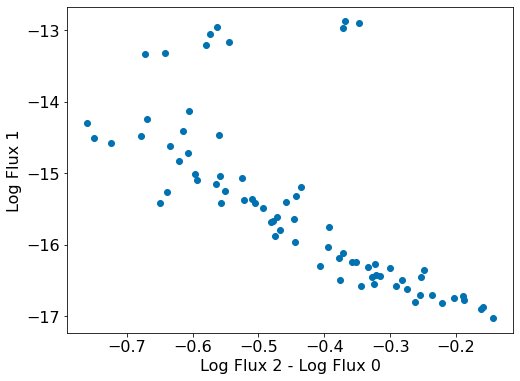

In [13]:
s = plt.scatter(colour,m1)
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

print('Parallaxes: mean %.3f, sd %.3f' % (np.mean(stars['par']),np.std(stars['par'])))

In [9]:
import glob # this package lets you search for filenames
import os

all_points = glob.glob('/Users/calinperez/Desktop/PHYS3080/Untitled/U07/*/*/points.txt')

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

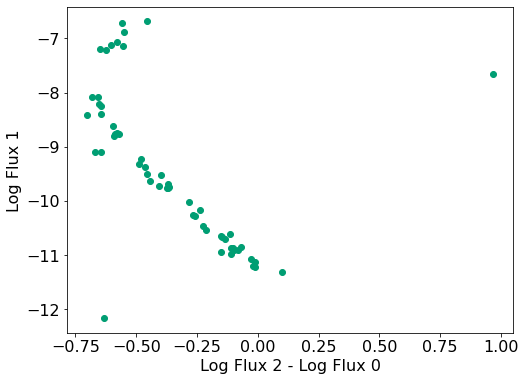

In [10]:
fig, ax1 = plt.subplots(1,1)
for j, point in enumerate(all_points):
    try:
        this = Table.read(point,format='ascii')
        
        thispar = this['par']
        thism0, thism1, thism2 = (np.log10(this['flux1']), 
                                  np.log10(this['flux2']), 
                                  np.log10(this['flux3']))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.05 # only pick the ones with good signal-to-noise
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color=colours[1])
    except:
        pass

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

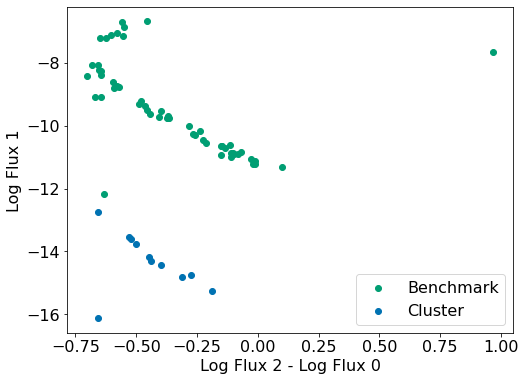

In [11]:
fig = plt.figure()
for j, point in enumerate(all_points):
    try:
        this = Table.read(point,format='ascii')

        thispar = this['par']
        thism0, thism1, thism2 = (np.log10(this['flux1']), 
                                  np.log10(this['flux2']), 
                                  np.log10(this['flux3']))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist)
        mm = thispar>0.05
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color=colours[1])
    except:
        pass

s = plt.scatter(colour,m1,color=colours[0])

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

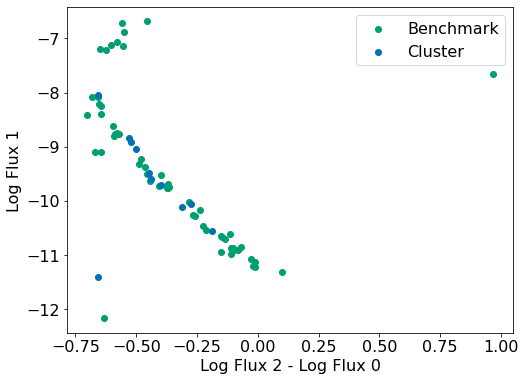

In [18]:
fig = plt.figure()
for j, point in enumerate(all_points):
    try:
        this = Table.read(point,format='ascii')

        thispar = this['par']
        thism0, thism1, thism2 = (np.log10(this['flux1']), 
                                  np.log10(this['flux2']), 
                                  np.log10(this['flux3']) )
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist)
        mm = thispar>0.05
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color=colours[1])
    except:
        pass

s = plt.scatter(colour,m1+4.7,color=colours[0])

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster']);